<h1>AI STREAM</h1>
<h1>Group Member</h1>
<pre>
    Name                      ID
1, Samuel Abatneh       UGR/7229/12
2, Simon Mekonnen       UGR/9508/12 
3, Feven Dereje         UGR/9461/12
</pre>

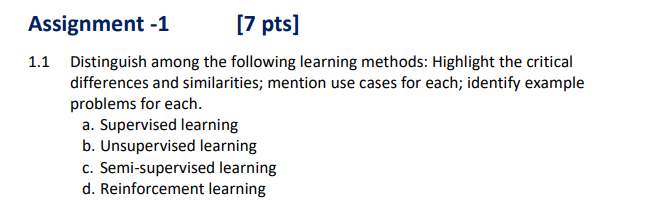

<h1>One common similarities between those methods is</h1>
<pre>All of them are machine learning types</pre>

<h2>Supervised learning</h2>
In supervised learning, algorithms train on a body of labeled data. Supervised learning algorithms 
can only learn attributes that are specified in the data set. Common applications of supervised learning are 
image recognition models. These models receive a set of labeled images and learn to distinguish common attributes of predefined forms.

<h2>Unsupervised learning</h2>
In unsupervised learning, developers turn algorithms loose on fully unlabeled data. 
The algorithm learns by cataloging its own observations about data features without being told what to look for.

<h2>Semisupervised learning</h2>
This method takes a middle-ground approach. Developers enter a relatively small set of labeled training data, as well as a larger corpus of unlabeled data. The algorithm is then instructed to extrapolate what it learns from the labeled data to the unlabeled data and draw conclusions from the set as a whole.

<h2>Reinforcement learning.</h2>
 This takes a different approach altogether. It situates an agent in an environment with clear parameters defining beneficial activity and nonbeneficial activity and an overarching endgame to reach. It is similar in some ways to supervised learning in that developers must give algorithms clearly specified goals and define rewards and punishments. This means the level of explicit programming required is greater than in unsupervised learning. But, once these parameters are set, the algorithm operates on its own, making it much more self-directed than supervised learning algorithms. For this reason, people sometimes refer to reinforcement learning as a branch of semisupervised learning, but in truth, it is most often acknowledged as its own type of machine learning.
<pre>



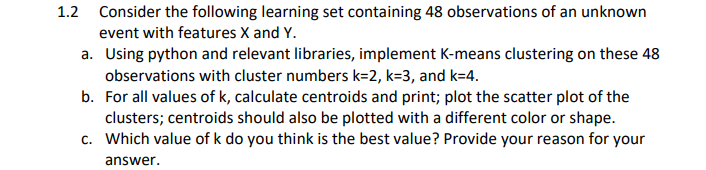
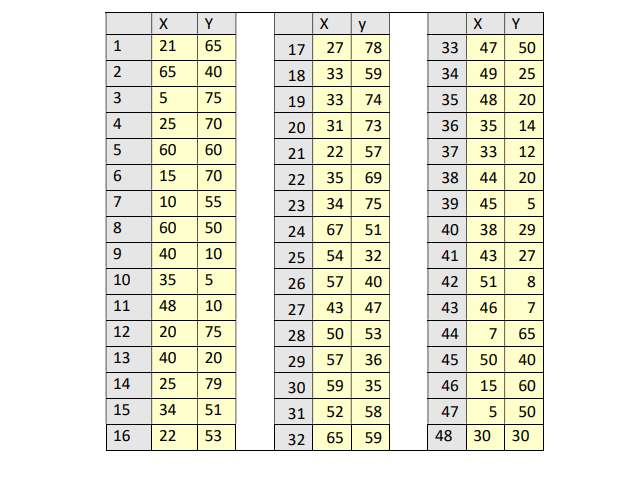

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns 

In [120]:
import warnings
warnings.filterwarnings("ignore")

In [121]:
data = pd.read_csv("data.csv")
x = data.iloc[:, [0, 1]].values

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       48 non-null     int64
 1   Y       48 non-null     int64
dtypes: int64(2)
memory usage: 896.0 bytes


In [138]:
data.head()

,X,Y
0,21,65
1,65,40
2,5,75
3,25,70
4,60,60


In [140]:
data.shape

(48, 2)

<h1>If k == 2</h1>

In [14]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

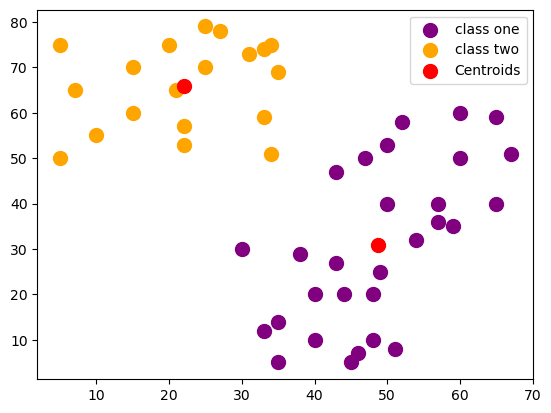

In [15]:
#Visualising the clusters when k is 2
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'class one')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'class two')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

<h1>If k == 3</h1>

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

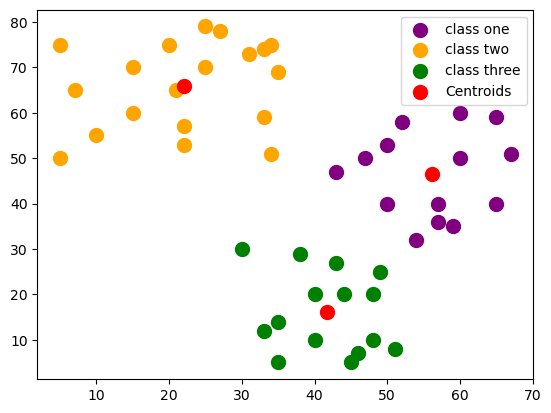

In [17]:
#Visualising the clusters when k is 3  
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'class one')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'class two')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'class three')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

<h1>If k == 4</h1>

In [13]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

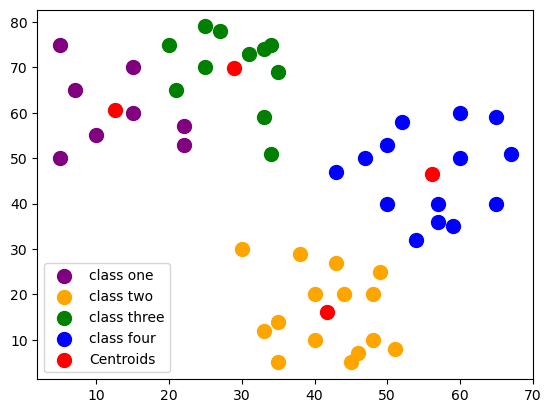

In [14]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'class one')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'class two')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'class three')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'blue', label = 'class four')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()


<h1>3 is better value of k</h1>
<pre>
The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for 
. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.
</pre>

In [19]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

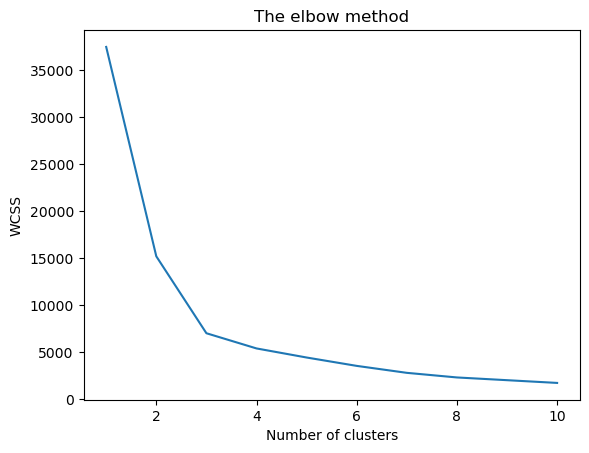

In [20]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

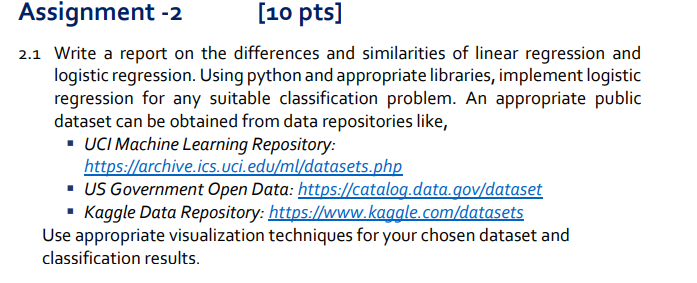

<div class="elementor-element elementor-element-4cd76c7 elementor-widget elementor-widget-text-editor w3_bg" data-id="4cd76c7" data-element_type="widget" data-widget_type="text-editor.default">
				<div class="elementor-widget-container w3_bg"> <p>Machine learning is one of the majorly advancing technologies in today’s data-driven world. Many businesses survey their audience and gather loads and loads of data to make conclusions out of it. And they use advanced data science tools for the prediction process.&nbsp;</p><p>Linear regressions and logistic regression are the two most famous and commonly used algorithms when it comes to machine learning. Both being supervised machine learning algorithms, they serve different purposes. Linear regression is used for predicting continuous values, whereas logistic regression is used in the binary classification of values.&nbsp;</p><p>In this article, we will have a look at how the two are different from each other. First, let’s begin by defining the two.</p></div></div>

<section class="elementor-section elementor-inner-section elementor-element elementor-element-77e58f7 elementor-section-boxed elementor-section-height-default w3_bg" data-id="77e58f7" data-element_type="section">
						<div class="elementor-container elementor-column-gap-default w3_bg">
					<div class="elementor-column elementor-col-100 elementor-inner-column elementor-element elementor-element-b531454 w3_bg" data-id="b531454" data-element_type="column">
			<div class="elementor-widget-wrap elementor-element-populated w3_bg">
								<div class="elementor-element elementor-element-387e171 elementor-widget elementor-widget-heading w3_bg" data-id="387e171" data-element_type="widget" data-widget_type="heading.default">
				<div class="elementor-widget-container w3_bg"> <span id="elementor-toc__heading-anchor-0" class="elementor-menu-anchor "></span><h2 class="elementor-heading-title elementor-size-large">Linear Regression Vs Logistic Regression: Definition </h2></div></div><div class="elementor-element elementor-element-7b58ede elementor-widget-divider--view-line elementor-widget elementor-widget-divider w3_bg" data-id="7b58ede" data-element_type="widget" data-widget_type="divider.default">
				<div class="elementor-widget-container w3_bg">
					<div class="elementor-divider w3_bg"> <span class="elementor-divider-separator"> </span></div></div></div><div class="elementor-element elementor-element-f0b1429 elementor-widget elementor-widget-text-editor w3_bg" data-id="f0b1429" data-element_type="widget" data-widget_type="text-editor.default">
				<div class="elementor-widget-container w3_bg"> <h3>Linear Regression</h3><p>A supervised machine learning algorithm linear regression assumes the presence of a linear relationship</a> between independent and dependent variables. Linear regression is used to predict value based on the independent variable.&nbsp;</p><h3>Logistic Regression</h3><p>Logistic regression is also a supervised machine learning algorithm. However, the point of difference is that it is a classification algorithm</a>. Logistic regression uses the value of the independent variable to predict the category of the dependent variable.&nbsp;</p></div></div></div></div></div></section>

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [141]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class CustomLogisticRegression:

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [142]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

clf = CustomLogisticRegression(lr=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test)

acc

0.9210526315789473

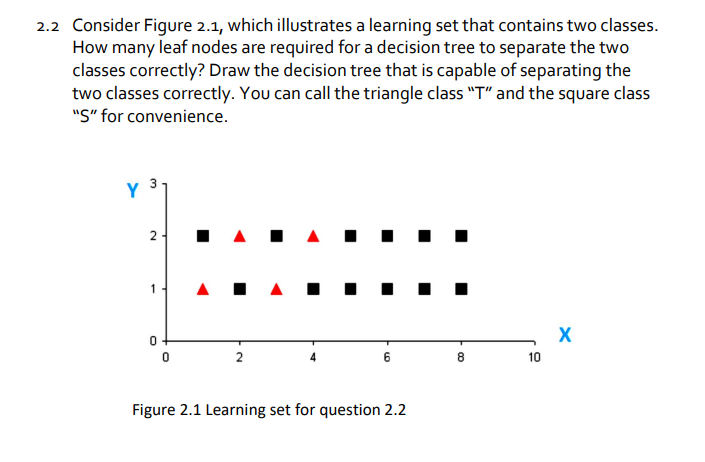

In [19]:
# We created new csv file called two_two.csv
# lets load the dataset
data2 = pd.read_csv("two_two.csv")

In [20]:
data2

,X,Y,Class
0,1,1,T
1,2,2,T
2,1,2,S
3,4,2,T
4,3,1,T
5,2,8,S
6,2,1,S
7,3,2,S
8,4,1,S
9,5,1,S


<h2>Decision Tree: GINI Index
<hr>Solution 
    </h>
    
   <pre>   
   <h3>Gini(X)</h3> = (2/17 * Gini(1))  + (3/17 * Gini(2)) + (2/17 * Gini(3)) +  <hr/>(2/17 * Gini(4) + ()) + (2/17 * Gini(5)) + (2 * 17 + Gini(6)) <hr/> + (2 / 17  * Gini(7)  + (2 / 17) * Gini(8))
   </pre>
   <pre>
   Gini(1) = 1 - ((1/2) ** 2 + (1/2) ** 2) => 0.5
   Gini(2) = 1 - ((1/3) ** 2 + (2/3) ** 2) => 0.073
   Gini(3) = 1 - ((1/2) ** 2 + (1/2) ** 2) => 0.5
   Gini(4) = 1 - ((1/2) ** 2 + (1/2) ** 2) => 0.5
   Gini(5) = 1 - ((2/2) ** 2+ (0/2)**2) => 0
   Gini(6) = 1 - ((2/2) ** 2+ (0/2)**2) => 0
   Gini(7) = 1 - ((2/2) ** 2+ (0/2)**2) => 0
   Gini(8) = 1 - ((2/2) ** 2+ (0/2)**2) => 0
   </pre>
   
   <pre>
   Gini(x) = 2/17 * 0.5 + 3/17 * 0.073 + 2/17 * 0.5 + 2/17*0.5 + 2/17*0 + 2/17*0 + 2/17*0 + 2/17*0 
   
   Gini(x) = 0.189
   </pre>
   
   
   

In [16]:
data2

,X,Y,Class
0,1,1,T
1,2,2,T
2,1,2,S
3,4,2,T
4,3,1,T
5,2,8,S
6,2,1,S
7,3,2,S
8,4,1,S
9,5,1,S


<hr/>
   <pre>   
   <h3>Gini(Y)</h3> = (8/17 * Gini(1))  + (8/17 * Gini(2)) + (1 / 17) * Gini(8))
   </pre>
   <pre>
   Gini(1) = 1 - ((2/8) ** 2 + (6/8) ** 2) => 0.375
   Gini(2) = 1 - ((2/8) ** 2 + (6/8) ** 2) => 0.375
   Gini(8) = 1 - ((1/1) ** 2 + (0/) ** 2) => 0
   </pre>
   
   <pre>
   
   Gini(y) = 8/17 * 0.375 + 8/17  * 0.375 + 1/17 * 0
   <br/>
   
   Gini(y) = 0.353
   </pre>
   
   <hr/>
   
   
   <pre>
   we choose with the minimum Gini index
   
   Gini(x) = 0.189 => minimum
   Gini(y) = 0.353
   </pre>
   
   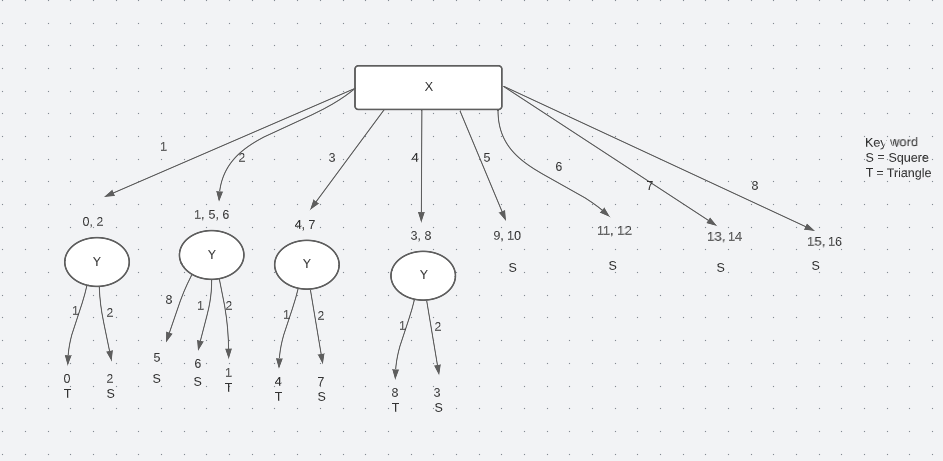
   
   We need 13 leaf nodes

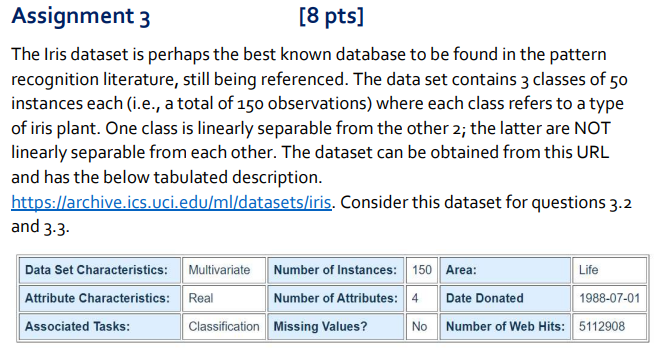

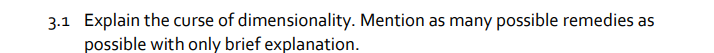

After importing all the necessary libraries, we need to load the dataset. Now, the iris dataset is already present in sklearn. First, we will load it and then convert it into a pandas data frame for ease of use.

In [50]:
from sklearn import datasets

#Load the Dataset
iris = datasets.load_iris()
#convert the dataset into a pandas data frame
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
#display the head (first 5 rows) of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<h2>Lets Standardize the feature before applying PCA</h2>
<br>
Before applying PCA or any other Machine Learning technique it is always considered good practice to standardize the data. For this, Standard Scalar is the most commonly used scalar. Standard Scalar is already present in sklearn. So, now we will standardize the feature set using Standard Scalar and store the scaled feature set as a pandas data frame.

In [94]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df))#scaling the data
scaled_data

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


<h2>Check the Co-relation between features without PCA</h2>

 <br>

Now, we will check the co-relation between our scaled dataset using a heat map. For this, we have already imported the seaborn library in Step-1. The correlation between various features is given by the corr() function and then the heat map is plotted by the heatmap() function. The colour scale on the side of the heatmap helps determine the magnitude of the co-relation. In our example, we can clearly see that a darker shade represents less co-relation while a lighter shade represents more co-relation. The diagonal of the heatmap represents the co-relation of a feature with itself – which is always 1.0, thus, the diagonal of the heatmap is of the highest shade.

<AxesSubplot:>

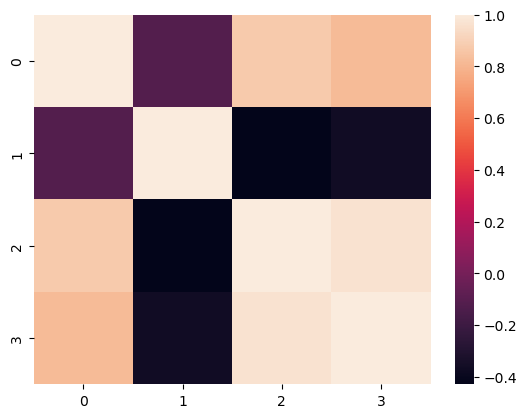

In [93]:
sns.heatmap(scaled_data.corr())

We can observe from the above heatmap that sepal length & petal length and petal length & petal width have high co-relation. Thus, we evidently need to apply dimensionality reduction. If you are already aware that your dataset needs dimensionality reduction – you can skip this step. 
<hr>

<h2>We will apply PCA on the scaled dataset. </h2>
<hr>
For this Python offers yet another in-built class called PCA which is present in sklearn.decomposition, which we have already imported in step-1. We need to create an object of PCA  and while doing so we also need to initialize n_components – which is the number of principal components we want in our final dataset. Here, we have taken n_components = 3, which means our final feature set will have 3 columns. We fit our scaled data to the PCA object which gives us our reduced dataset.

In [55]:
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


Now that we have applied PCA and obtained the reduced feature set, we will check the co-relation between various Principal Components, again by using a heatmap.

<AxesSubplot:>

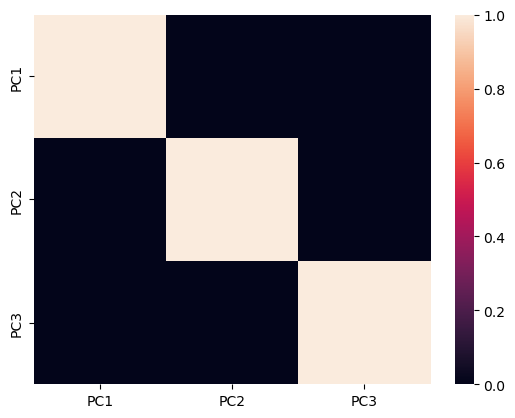

In [56]:
sns.heatmap(data_pca.corr())

The above heatmap clearly depicts that there is no correlation between various obtained principal components (PC1, PC2, and PC3). Thus, we have moved from higher dimensional feature space to a lower-dimensional feature space while ensuring that there is no correlation between the so obtained PCs is minimum. Hence, we have accomplished the objectives of PCA.
<hr>

We are asked two reduce two dimentional

we will reduce two dimentional

In [58]:
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['feat1','feat2'])
data_pca.head()

,feat1,feat2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


<AxesSubplot:>

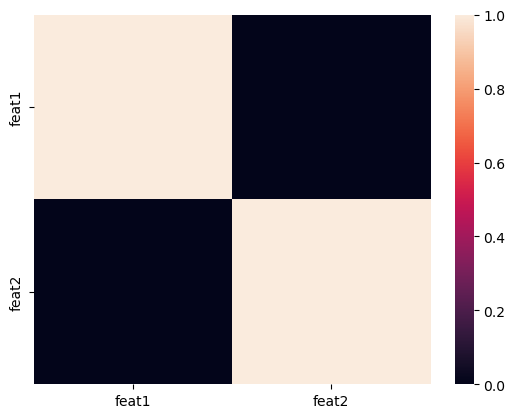

In [59]:
sns.heatmap(data_pca.corr())

In [77]:
scaled_data

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [78]:
df2 = df.mean()

In [79]:
df2

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

First lets calculate the covariance

In [80]:
cova = df.cov()
cova

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [81]:
eigen_values, eigen_vector = np.linalg.eig(cova)

In [82]:
eigen_values

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [83]:
eigen_vector

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [84]:
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['feat1','feat2'])
data_pca.head()

,feat1,feat2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [85]:
data_pca

X = data_pca.iloc[:, [0, 1]].values
X[:25]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446]])

In [86]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

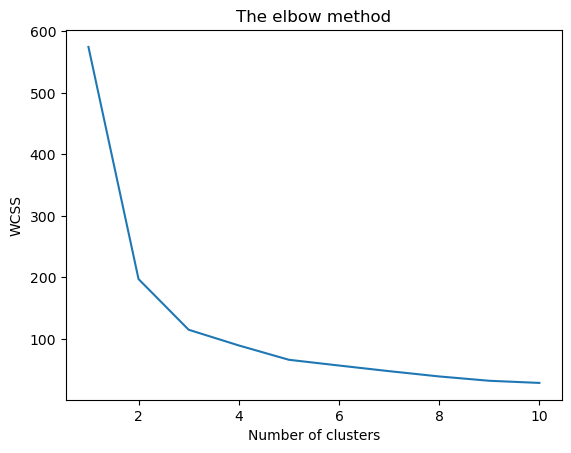

In [87]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [114]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [115]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

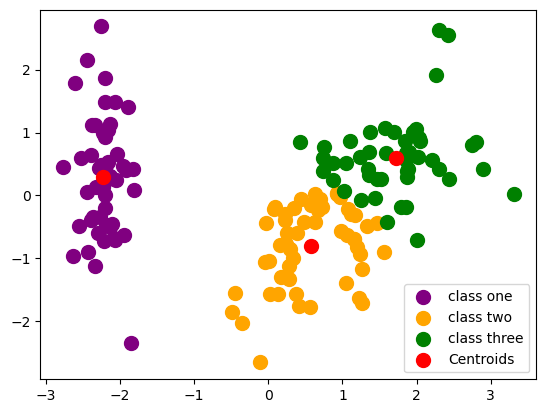

In [117]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'class one')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'class two')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'class three')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

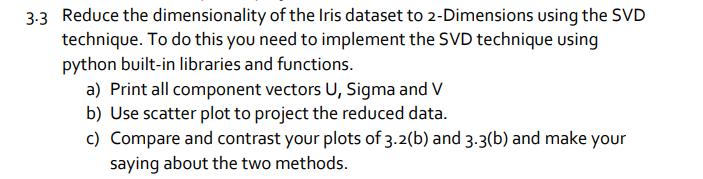

In [95]:
from sklearn import datasets

#Load the Dataset
iris = datasets.load_iris()
#convert the dataset into a pandas data frame
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
#display the head (first 5 rows) of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [96]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df))#scaling the data
scaled_data

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


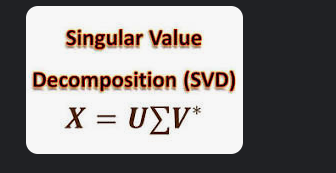

Let me use numpy liberaris to get U, sigma and V

In [97]:
U, sigma, V = np.linalg.svd(scaled_data)
U

array([[-1.08239531e-01, -4.09957970e-02,  2.72186462e-02, ...,
         5.43380310e-02,  1.96438400e-03,  2.46978090e-03],
       [-9.94577561e-02,  5.75731483e-02,  5.00034005e-02, ...,
         5.12936114e-03,  8.48544595e-02,  5.83496936e-03],
       [-1.12996303e-01,  2.92000319e-02, -9.42089147e-03, ...,
         2.75184277e-02,  1.78604309e-01,  1.49419118e-01],
       ...,
       [ 7.27030413e-02, -2.29793601e-02, -3.84023516e-02, ...,
         9.89532683e-01, -1.25488246e-02, -7.17729676e-04],
       [ 6.56112167e-02, -8.63643414e-02, -1.98939364e-01, ...,
        -1.41206665e-02,  9.52049996e-01, -2.32048811e-02],
       [ 4.59137323e-02,  2.07800179e-03, -1.12588405e-01, ...,
        -8.30595907e-04, -2.19201906e-02,  9.77300244e-01]])

In [98]:
sigma

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [99]:
V

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

In [101]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd.fit(scaled_data)
result = svd.transform(scaled_data)
result[:25]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446]])

In [102]:
data = pd.DataFrame(result)
data

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


<AxesSubplot:>

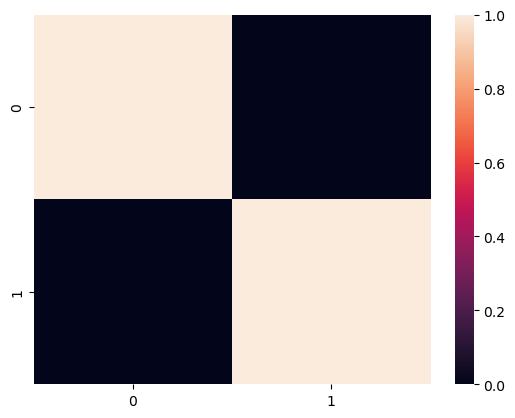

In [103]:
sns.heatmap(data.corr())

In [104]:
X = data.iloc[:, [0, 1]].values
X[:25]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446]])

In [109]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [112]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

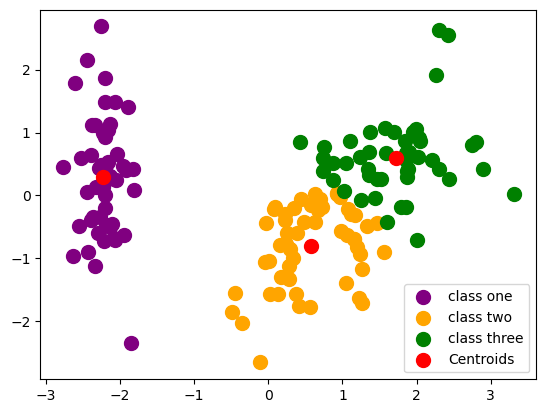

In [113]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'class one')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'class two')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'class three')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

<h1>There is no significant difference bitween PCA and SVD dimentinality reduction methods for this datasets</h1>

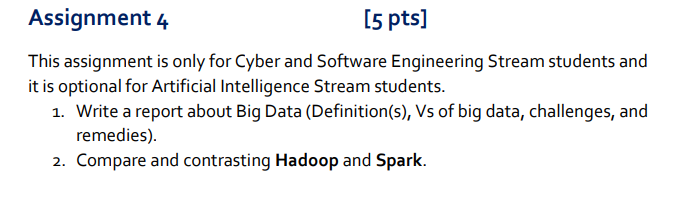

<h1>Defnition</h1>
<p id="mntl-sc-block_1-0-1" class="comp mntl-sc-block finance-sc-block-html mntl-sc-block-html">
Big data refers to&nbsp;the large, diverse sets of information that grow at ever-increasing rates. It encompasses the volume of information, the velocity or speed at which it is created and collected, and the variety or scope of the data points being covered (known as the "three v's" of big data). Big data often comes from data mining and arrives in multiple formats.
</p>

<p> Big Data is simply a catchall term used to describe data too large and complex to store in traditional databases. The “five ‘V’s” of Big Data are:</p>
<ul>
<li aria-level="1">Volume – The amount of data generated</li>
<li aria-level="1">Velocity - The speed at which data is generated, collected and analyzed</li>
<li aria-level="1">Variety - The different types of structured, semi-structured and unstructured data</li>
<li aria-level="1">Value - The ability to turn data into useful insights</li>
<li aria-level="1">Veracity - Trustworthiness in terms of quality and accuracy&nbsp;</li>
</ul>

<article><h1 id="challenges_of_big_data">Challenges of Big Data</h1>
<h3>Storage</h3>
<p>With vast amounts of data generated daily, the greatest challenge is storage (especially when the data is in different formats) within legacy systems. Unstructured data cannot be stored in traditional databases.</p>
<h3>Processing</h3>
<p>Processing big data refers to the reading, transforming, extraction, and formatting of useful information from raw information. The input and output of information in unified formats continue to present difficulties.</p>
<h3>Security</h3>
<p>Security is a big concern for organizations. Non-encrypted information is at risk of theft or damage by cyber-criminals. Therefore, data security professionals must balance access to data against maintaining strict security protocols.</p>
<h3>Finding and Fixing Data Quality Issues</h3>
<p>Many of you are probably dealing with challenges related to poor data quality, but solutions are available. The following are four approaches to fixing data problems:</p>
<ul>
<li aria-level="1">Correct information in the original database.</li>
<li aria-level="1">Repairing the original data source is necessary to resolve any data inaccuracies.</li>
<li aria-level="1">You must use highly accurate methods of determining who someone is.</li>
</ul>
<h3>Scaling Big Data Systems</h3>
<p>Database sharding, memory caching, moving to the cloud and separating read-only and write-active databases are all effective scaling methods. While each one of those approaches is fantastic on its own, combining them will lead you to the next level.</p>
<h3>Evaluating and Selecting Big Data Technologies</h3>
<p>Companies are spending millions on new big data technologies, and the market for such tools is expanding rapidly. In recent years, however, the IT industry has caught on to big data and analytics potential. The trending technologies include the following:</p>
<ul>
<li aria-level="1">Hadoop Ecosystem</li>
<li aria-level="1">Apache Spark</li>
<li aria-level="1">NoSQL Databases</li>
<li aria-level="1">R Software</li>
<li aria-level="1">Predictive Analytics</li>
<li aria-level="1">Prescriptive Analytics</li>
</ul>
<h3>Big Data Environments</h3>
<p>In an extensive data set, data is constantly being ingested from various sources, making it more dynamic than a data warehouse. The people in charge of the big data environment will fast forget where and what each data collection came from.</p>
<h3>Real-Time Insights</h3>
<p>The term "real-time analytics" describes the practice of performing analyses on data as a system is collecting it. Decisions may be made more efficiently and with more accurate information thanks to real-time analytics tools, which use logic and mathematics to deliver insights on this data quickly.</p>
<h3>Data Validation</h3>
<p>Before using data in a business process, its integrity, accuracy, and structure must be validated. The output of a data validation procedure can be used for further analysis, BI, or even to train a machine learning model.</p>
<h3>Healthcare Challenges</h3>
<p>Electronic health records (EHRs), genomic sequencing, medical research, wearables, and medical imaging are just a few examples of the many sources of health-related big data.</p>

    
<h1>Remedies</h1>
    <h2>Hadoop Distributed File System (HDFS) </h2><p>is the storage unit of Hadoop. It is a fault-tolerant, reliable, scalable layer of the Hadoop cluster. Designed for use on commodity machines with low-cost hardware, Hadoop allows access to data across multiple Hadoop clusters on various servers. HDFS has a default block size of 128 MB from Hadoop version 2 onwards, which can be increased based on requirements.</p>
    
 <h2>Hadoop MapReduce</h2>
 <p><i>Hadoop MapReduce</i> allows the user to perform distributed parallel processing on large volumes of data quickly and efficiently.</p>
    
<h1>Hadoop vs Spark</h1>
    
  <ol><li><strong>Performance: </strong>Spark is faster because it uses random access memory (RAM) instead of reading and writing intermediate data to disks. Hadoop stores data on multiple sources and processes it in batches via MapReduce.</li>
	<li><strong>Cost:</strong><em> </em>Hadoop runs at a lower cost since it relies on any disk storage type for data processing. Spark runs at a higher cost because it relies on in-memory computations for real-time data processing, which requires it to use high quantities of RAM to spin up nodes.</li>
	<li><strong>Processing: </strong>Though both platforms process data in a distributed environment, Hadoop is ideal for batch processing and linear data processing. Spark is ideal for real-time processing and processing live unstructured data streams.</li>
	<li><strong>Scalability:</strong><em> </em>When data volume rapidly grows, Hadoop quickly scales to accommodate the demand via Hadoop Distributed File System (HDFS). In turn, Spark relies on the fault tolerant HDFS for large volumes of data.</li>
	<li><strong>Security:</strong> Spark enhances security with authentication via shared secret or event logging, whereas Hadoop uses multiple authentication and access control methods. Though, overall, Hadoop is more secure, Spark can integrate with Hadoop to reach a higher security level.</li>
	<li><strong>Machine learning (ML):</strong><em> </em>Spark is the superior platform in this category because it includes MLlib, which performs iterative in-memory ML computations. It also includes tools that perform regression, classification, persistence, pipeline construction, evaluation, etc.</li>
</ol>

<h1>Thank you!!<h1>